# Tutorial 3 - Dynamics

The dynamics of magnetisation field $\mathbf{m}$ is governed by the Landau-Lifshitz-Gilbert (LLG) equation

$$\frac{d\mathbf{m}}{dt} = \underbrace{-\gamma_{0}(\mathbf{m} \times \mathbf{H}_\text{eff})}_\text{precession} + \underbrace{\alpha\left(\mathbf{m} \times \frac{d\mathbf{m}}{dt}\right)}_\text{damping},$$

where $\gamma_{0}$ is the gyromagnetic ratio, $\alpha$ is the Gilbert damping, and $\mathbf{H}_\text{eff}$ is the effective field. It consists of two terms: precession and damping. In this exercise, we will explore some basic properties of this equation to understand how to define it in simulations.

We will study the simplest "zero-dimensional" case - macrospin. In the first step, after we import necessary modules (`oommfc` and `discretisedfield`), we create the mesh which consists of a single finite difference cell.

In [1]:
import oommfc as oc
import discretisedfield as df
%matplotlib inline

# Define macro spin mesh (i.e. one discretisation cell).
p1 = (0, 0, 0)  # first point of the mesh domain (m)
p2 = (1e-9, 1e-9, 1e-9)  # second point of the mesh domain (m)
cell = (1e-9, 1e-9, 1e-9)  # discretisation cell size (m)
mesh = oc.Mesh(p1=p1, p2=p2, cell=cell)

Now, we can create a micromagnetic system object.

In [2]:
system = oc.System(name="macrospin")

Let us assume we have a simple Hamiltonian which consists of only Zeeman energy term

$$\mathcal{H} = -\mu_{0}M_\text{s}\mathbf{m}\cdot\mathbf{H},$$

where $M_\text{s}$ is the saturation magnetisation, $\mu_{0}$ is the magnetic constant, and $\mathbf{H}$ is the external magnetic field. For more information on defining micromagnetic Hamiltonians, please refer to the [Hamiltonian tutorial](tutorial2_hamiltonian.ipynb). We apply the external magnetic field with magnitude $H = 2 \times 10^{6} \,\text{A}\,\text{m}^{-1}$ in the positive $z$ direction.

In [3]:
H = (0, 0, 2e6)  # external magnetic field (A/m)
system.hamiltonian = oc.Zeeman(H=H)

In the next step we can define the system's dynamics. Let us assume we have $\gamma_{0} = 2.211 \times 10^{5} \,\text{m}\,\text{A}^{-1}\,\text{s}^{-1}$ and $\alpha=0.1$.

In [4]:
gamma = 2.211e5  # gyromagnetic ratio (m/As)
alpha = 0.1  # Gilbert damping

system.dynamics = oc.Precession(gamma=gamma) + oc.Damping(alpha=alpha)

To check what is our dynamics equation:

In [5]:
system.dynamics

Precession(gamma=221100.0, name="precession") + Damping(alpha=0.1, name="damping")

Before we start running time evolution simulations, we need to initialise the magnetisation. In this case, our magnetisation is pointing in the positive $x$ direction with $M_\text{s} = 8 \times 10^{6} \,\text{A}\,\text{m}^{-1}$. The magnetisation is defined using `Field` class from the `discretisedfield` package we imported earlier.

In [6]:
initial_m = (1, 0, 0)  # vector in x direction
Ms = 8e6  # magnetisation saturation (A/m)

system.m = df.Field(mesh, value=initial_m, norm=Ms)

Now, we can run the time evolution using `TimeDriver` for $t=0.1 \,\text{ns}$ and save the magnetisation configuration in $n=200$ steps.

In [7]:
td = oc.TimeDriver()

td.drive(system, t=0.1e-9, n=200)

2018/07/09 20:39: Running OOMMF (macrospin/macrospin.mif) ... (3.0 s)


How different system parameters vary with time, we can inspect by showing the system's datatable.

In [8]:
system.dt

,E,Ecount,max_dm/dt,dE/dt,deltaE,E_Zeeman,iteration,stage_iteration,stage,mx,my,mz,last_time_step,t
0,-4.400762e-22,37.0,25204.415522,-8.798712e-10,-3.269612e-22,-4.400762e-22,6.0,6.0,0.0,0.975901,0.217115,0.021888,3.715017e-13,5.000000e-13
1,-8.797309e-22,44.0,25186.311578,-8.786077e-10,-4.396547e-22,-8.797309e-22,8.0,1.0,1.0,0.904810,0.423562,0.043754,5.000000e-13,1.000000e-12
2,-1.318544e-21,51.0,25156.186455,-8.765071e-10,-4.388134e-22,-1.318544e-21,10.0,1.0,2.0,0.790286,0.609218,0.065579,5.000000e-13,1.500000e-12
3,-1.756100e-21,58.0,25114.112032,-8.735776e-10,-4.375555e-22,-1.756100e-21,12.0,1.0,3.0,0.638055,0.765021,0.087341,5.000000e-13,2.000000e-12
4,-2.191985e-21,65.0,25060.188355,-8.698302e-10,-4.358857e-22,-2.191985e-21,14.0,1.0,4.0,0.455710,0.883427,0.109020,5.000000e-13,2.500000e-12
5,-2.625796e-21,72.0,24994.543058,-8.652792e-10,-4.338104e-22,-2.625796e-21,16.0,1.0,5.0,0.252321,0.958790,0.130596,5.000000e-13,3.000000e-12
6,-3.057133e-21,79.0,24917.330629,-8.599414e-10,-4.313375e-22,-3.057133e-21,18.0,1.0,6.0,0.037964,0.987644,0.152049,5.000000e-13,3.500000e-12
7,-3.485609e-21,86.0,24828.731532,-8.538369e-10,-4.284760e-22,-3.485609e-21,20.0,1.0,7.0,-0.176794,0.968860,0.173360,5.000000e-13,4.000000e-12
8,-3.910846e-21,93.0,24728.951193,-8.469880e-10,-4.252366e-22,-3.910846e-21,22.0,1.0,8.0,-0.381440,0.903698,0.194510,5.000000e-13,4.500000e-12
9,-4.332477e-21,100.0,24618.218851,-8.394196e-10,-4.216312e-22,-4.332477e-21,24.0,1.0,9.0,-0.566044,0.795715,0.215480,5.000000e-13,5.000000e-12


However, in our case it is much more informative if we plot the time evolution of magnetisation $z$ component $m_{z}(t)$.

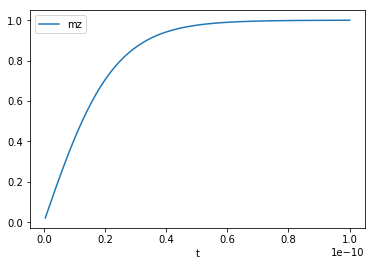

In [9]:
system.dt.plot("t", "mz");

Similarly, we can plot all three magnetisation components

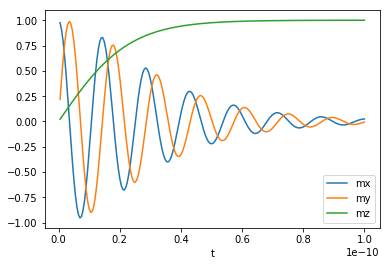

In [10]:
system.dt.plot("t", ["mx", "my", "mz"]);

We can see that after some time the macrospin aligns parallel to the external magnetic field in the $z$ direction. We can explore the effect of Gilbert damping $\alpha = 0.2$ on the magnetisation dynamics.

2018/07/09 20:39: Running OOMMF (macrospin/macrospin.mif) ... (2.9 s)


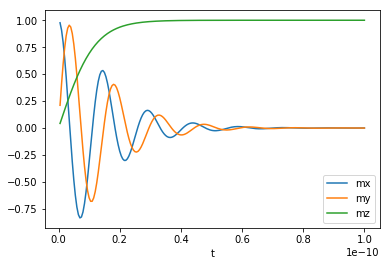

In [11]:
system.dynamics.damping.alpha = 0.2
system.m = df.Field(mesh, value=initial_m, norm=Ms)

td.drive(system, t=0.1e-9, n=200)

system.dt.plot("t", ["mx", "my", "mz"]);

### Exercise 1

By looking at the previous example, explore the magnetisation dynamics for $\alpha=0.005$ in the following code cell.

2018/07/09 20:39: Running OOMMF (macrospin/macrospin.mif) ... (2.9 s)


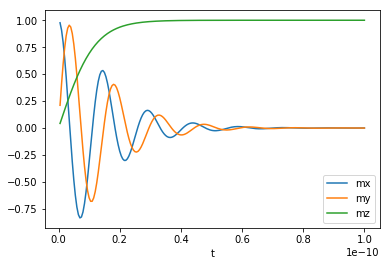

In [12]:
system.dynamics.damping.alpha = 0.2
system.m = df.Field(mesh, value=initial_m, norm=Ms)

td.drive(system, t=0.1e-9, n=200)

system.dt.plot("t", ["mx", "my", "mz"]);

## Exercise 2

Repeat the simulation with $\alpha=0.1$ and `H = (0, 0, -2e6)`.

2018/07/09 20:39: Running OOMMF (macrospin/macrospin.mif) ... (3.1 s)


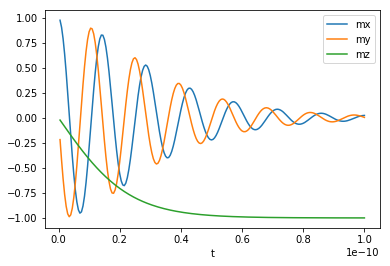

In [13]:
system.dynamics.damping.alpha = 0.1
system.hamiltonian.zeeman.H = (0, 0, -2e6)
system.m = df.Field(mesh, value=initial_m, norm=Ms)

td.drive(system, t=0.1e-9, n=200)

system.dt.plot("t", ["mx", "my", "mz"]);

### Exercise 3

Keep using $\alpha=0.1$. 

Change the field from `H = (0, 0, -2e6)` to `H = (0, -1.41e6, -1.41e6)`, and plot
$m_x(t)$, $m_y(t)$ and $m_z(t)$ as above. Can you explain the (initially non-intuitive) output?

2018/07/09 20:39: Running OOMMF (macrospin/macrospin.mif) ... (3.0 s)


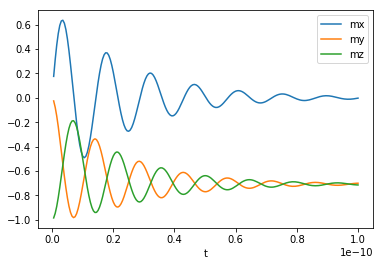

In [14]:
system.hamiltonian.zeeman.H = (0, -1.41e6, -1.41e6)

td.drive(system, t=0.1e-9, n=200)

system.dt.plot("t", ["mx", "my", "mz"]);